In [12]:
"""Sentiment Analysisに時系列データを追加＋タイトルなどを出力するように調整"""
%precision 3

'%.3f'

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from sklearn.cluster import KMeans
from collections import OrderedDict
from scipy.optimize import curve_fit

In [14]:
with open("analysed/ethical_statement_pos.txt","r", encoding="utf8", errors='ignore')as f:
    entire_txt = f.read()
    """stm = entire_txt.split(".")""" 
    stm = entire_txt.splitlines()
    print("Text lines =", len(stm))
    """print("Text lines =", len(stm))"""

Text lines = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


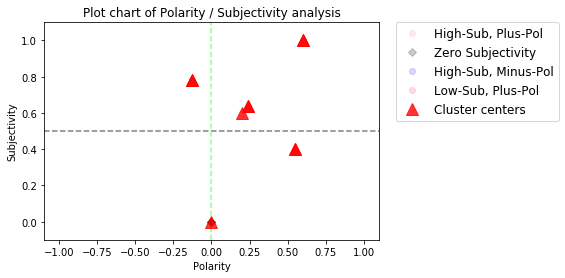

In [15]:
pol_sub = [] 
pol_abs_array = []
pol_array = []
sub_array = []
plot_array = []

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)

p = plt.hlines([0.5], -1.1, 1.1, "grey", linestyles='dashed') 
p = plt.vlines([0.0], -0.1, 1.1, "palegreen", linestyles='dashed')

for i,item in enumerate(stm):
    stm2 = TextBlob(stm[i])
    pol_sub.append([stm2.sentiment.polarity, stm2.sentiment.subjectivity])
    
    pol_abs_array.append(abs(stm2.sentiment.polarity))
    pol_array.append(stm2.sentiment.polarity)
    sub_array.append(stm2.sentiment.subjectivity)
    plot_array.append(i)
    
Neutral_P = 0
Neutral_S = 0
Zero_S = 0
High_S_Minus_P = 0
High_S_Plus_P = 0
Low_S_Minus_P = 0
Low_S_Plus_P = 0


for i,item in enumerate(stm):
    plt.xlabel("Polarity")
    plt.ylabel("Subjectivity")
    if (pol_sub[i][0] == 0.00 and pol_sub[i][1] != 0.00):
        Neutral_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"x", color="green", alpha = 0.3,label = "Neutral Polarity")
    if (pol_sub[i][1] == 0.50):
        Neutral_S += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"x", color="black", alpha = 0.3,label = "Neutral Subjectivity")
    if (pol_sub[i][0] < 0.00 and pol_sub[i][1] > 0.50):
        High_S_Minus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="blue", alpha = 0.15,label = "High-Sub, Minus-Pol")
    if (pol_sub[i][0] > 0.00 and pol_sub[i][1] > 0.50):
        High_S_Plus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="salmon", alpha = 0.15,label = "High-Sub, Plus-Pol")
    if (pol_sub[i][0] < 0.00 and pol_sub[i][1] < 0.50):
        Low_S_Minus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="darkturquoise", alpha = 0.15,label = "Low-Sub, Minus-Pol")
    if (pol_sub[i][0] > 0.00 and pol_sub[i][1] < 0.50):
        Low_S_Plus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="deeppink", alpha = 0.15,label = "Low-Sub, Plus-Pol")
    if (pol_sub[i][1] == 0.00):
        Zero_S += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"D", color="black", alpha = 0.2,label = "Zero Subjectivity")
    
clusters = 10
kmean = KMeans(clusters)
kmean.fit(pol_sub)

for i in range(0, clusters):
    plt.plot(kmean.cluster_centers_[i][0], kmean.cluster_centers_[i][1],"^", c ="red", ms = 12, alpha = 0.8, label = "Cluster centers")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.title('Plot chart of Polarity / Subjectivity analysis')
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

High-Sub, Minus-Pol = 1 
(Red)    10.0 %
High-Sub, Plus-Pol = 3 
(Blue)   30.0 %
Low-Sub, Minus-Pol = 0 
(Pink)   0.0 %
Low-Sub, Plus-Pol = 1 
(Cyan)   10.0 %
Neutral Polarity = 0 
(Green)  0.0 %
Neutral Subjectivity = 0 
(Grey)   0.0 %
Zero Subjectivity = 5 
(Black)  50.0 %


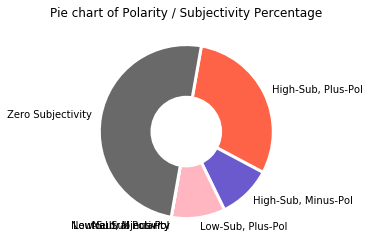

In [16]:
total_plots = len(plot_array)

print("High-Sub, Minus-Pol =", High_S_Minus_P,"\n(Red)   ",round((High_S_Minus_P/total_plots)*100,2), "%")
print("High-Sub, Plus-Pol =", High_S_Plus_P,"\n(Blue)  ",round((High_S_Plus_P/total_plots)*100,2), "%")
print("Low-Sub, Minus-Pol =", Low_S_Minus_P,"\n(Pink)  ",round((Low_S_Minus_P/total_plots)*100,2), "%")
print("Low-Sub, Plus-Pol =", Low_S_Plus_P,"\n(Cyan)  ",round((Low_S_Plus_P/total_plots)*100,2), "%")
print("Neutral Polarity =", Neutral_P,"\n(Green) ",round((Neutral_P/total_plots)*100,2), "%")
print("Neutral Subjectivity =", Neutral_S,"\n(Grey)  ",round((Neutral_S/total_plots)*100,2), "%")
print("Zero Subjectivity =", Zero_S,"\n(Black) ",round((Zero_S/total_plots)*100,2), "%")

x = np.array([High_S_Plus_P, High_S_Minus_P, Low_S_Plus_P, Low_S_Minus_P, Neutral_P, Neutral_S, Zero_S])
label = ["High-Sub, Plus-Pol", "High-Sub, Minus-Pol", "Low-Sub, Plus-Pol", "Low-Sub, Minus-Pol", "Neutral Polarity", "Neutral Subjectivity","Zero Subjectivity"]
colors = ["tomato", "slateblue", "lightpink", "lightblue", "darkseagreen","darkgrey","dimgrey"]

plt.title('Pie chart of Polarity / Subjectivity Percentage')
plt.pie(x, labels=label, counterclock=False, startangle=80, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor':"white"})

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=2.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

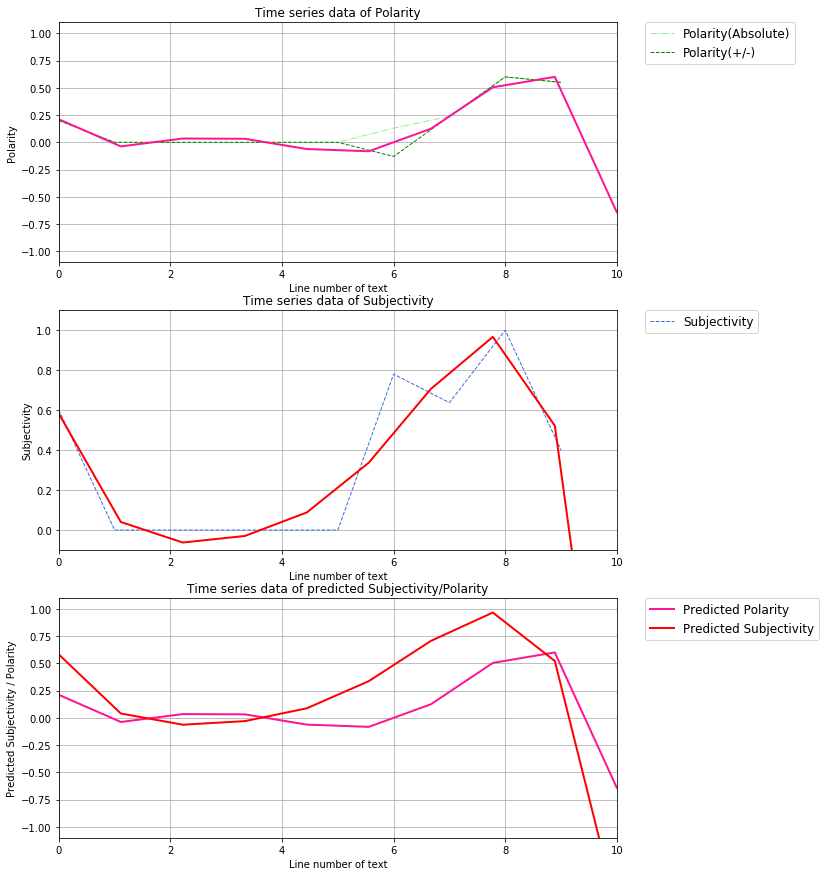

In [17]:
fig, (axU, axD, axPred) = plt.subplots(nrows=3, figsize=(10,15))

axU.set_xlim([0, len(plot_array)])
axU.set_ylim([-1.1, 1.1])
axD.set_xlim([0, len(plot_array)])
axD.set_ylim([-0.1, 1.1])

axPred.set_xlim([0, len(plot_array)])
axPred.set_ylim([-1.1, 1.1])

axU.plot(plot_array, pol_abs_array,"-.", color = "lightgreen",label = "Polarity(Absolute)", linewidth = 1)
axU.plot(plot_array, pol_array,"--", color = "green",label = "Polarity(+/-)", linewidth = 1)
axU.set_title('Time series data of Polarity')
axU.set_xlabel('Line number of text')
axU.set_ylabel('Polarity')
axU.set_xlim(0, len(plot_array))
axU.grid(True)
axU.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

axD.plot(plot_array, sub_array,"--", color = "royalblue",label = "Subjectivity", linewidth = 1)
axD.set_title('Time series data of Subjectivity')
axD.set_xlabel('Line number of text')
axD.set_ylabel('Subjectivity')
axD.set_xlim(0, len(plot_array))
axD.grid(True)
axD.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

axPred.set_title('Time series data of predicted Subjectivity/Polarity')
axPred.set_xlabel('Line number of text')
axPred.set_ylabel('Predicted Subjectivity / Polarity')
axPred.grid(True)
predict_pol = np.polyfit(plot_array, pol_array,5)
equation_pol = np.poly1d(predict_pol)
predict_pol_plot = np.linspace(0,len(plot_array),len(plot_array))
axU.plot(predict_pol_plot,equation_pol(predict_pol_plot),"-", color = "deeppink",label = "Predicted Polarity", linewidth = 2,alpha = 1.0)
axPred.plot(predict_pol_plot,equation_pol(predict_pol_plot),"-", color = "deeppink",label = "Predicted Polarity", linewidth = 2,alpha = 1.0)

predict_sub = np.polyfit(plot_array, sub_array,5)
equation_sub = np.poly1d(predict_sub)
predict_sub_plot = np.linspace(0,len(plot_array),len(plot_array))
axD.plot(predict_sub_plot,equation_sub(predict_sub_plot),"-", color = "red",label = "Predicted Subjectivity", linewidth = 2,alpha = 1.0)
axPred.plot(predict_sub_plot,equation_sub(predict_sub_plot),"-", color = "red",label = "Predicted Subjectivity", linewidth = 2,alpha = 1.0)
axPred.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

In [18]:
print(pol_sub)

[[0.2, 0.6], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-0.13, 0.78], [0.2375, 0.6375], [0.6, 1.0], [0.55, 0.4]]
